# 1. One-way ANOVA

In [1]:
# One-way ANOVA

library(multcomp)
attach(cholesterol)
table(trt)

Loading required package: mvtnorm

Loading required package: survival

Loading required package: TH.data

Loading required package: MASS


Attaching package: ‘TH.data’


The following object is masked from ‘package:MASS’:

    geyser




trt
 1time 2times 4times  drugD  drugE 
    10     10     10     10     10 

In [2]:
aggregate(response, by = list(trt), FUN = mean)

Group.1,x
<fct>,<dbl>
1time,5.78197
2times,9.22497
4times,12.37478
drugD,15.36117
drugE,20.94752


In [3]:
aggregate(response, by = list(trt), FUN = sd)

Group.1,x
<fct>,<dbl>
1time,2.878113
2times,3.483054
4times,2.923119
drugD,3.454636
drugE,3.345003


In [4]:
fit <- aov(response ~ trt)
summary(fit)

            Df Sum Sq Mean Sq F value   Pr(>F)    
trt          4 1351.4   337.8   32.43 9.82e-13 ***
Residuals   45  468.8    10.4                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess




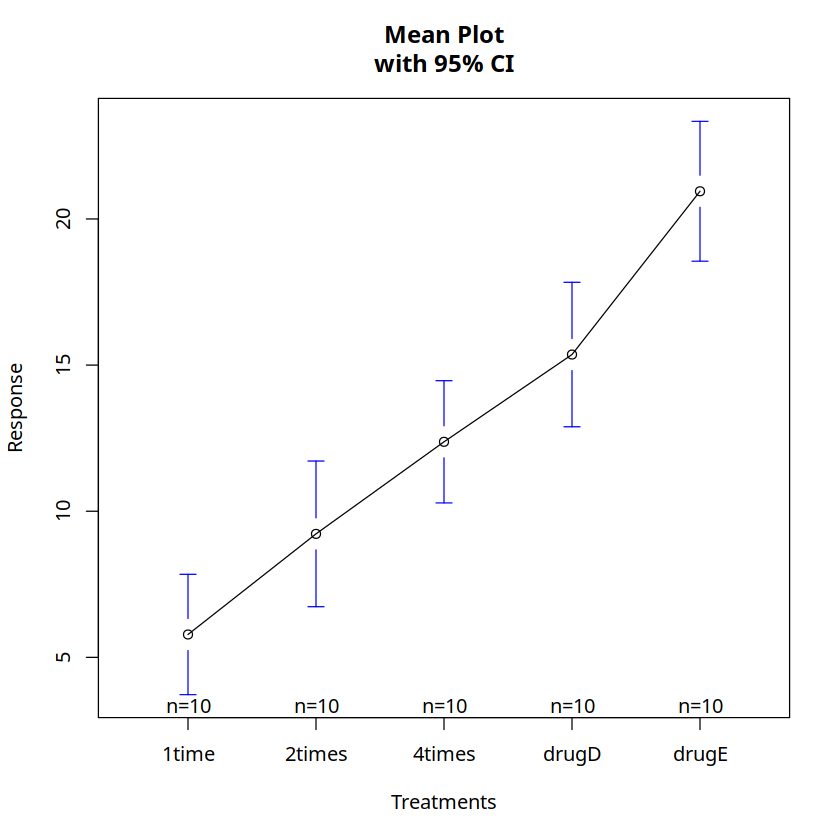

In [5]:
library(gplots)
plotmeans(response ~ trt, xlab="Treatments", ylab= "Response", main= "Mean Plot\nwith 95% CI")
detach(cholesterol)

## Multiple comparisons

In [6]:
# Tukey HSD pairwise group comparisons

TukeyHSD(fit)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = response ~ trt)

$trt
                  diff        lwr       upr     p adj
2times-1time   3.44300 -0.6582817  7.544282 0.1380949
4times-1time   6.59281  2.4915283 10.694092 0.0003542
drugD-1time    9.57920  5.4779183 13.680482 0.0000003
drugE-1time   15.16555 11.0642683 19.266832 0.0000000
4times-2times  3.14981 -0.9514717  7.251092 0.2050382
drugD-2times   6.13620  2.0349183 10.237482 0.0009611
drugE-2times  11.72255  7.6212683 15.823832 0.0000000
drugD-4times   2.98639 -1.1148917  7.087672 0.2512446
drugE-4times   8.57274  4.4714583 12.674022 0.0000037
drugE-drugD    5.58635  1.4850683  9.687632 0.0030633


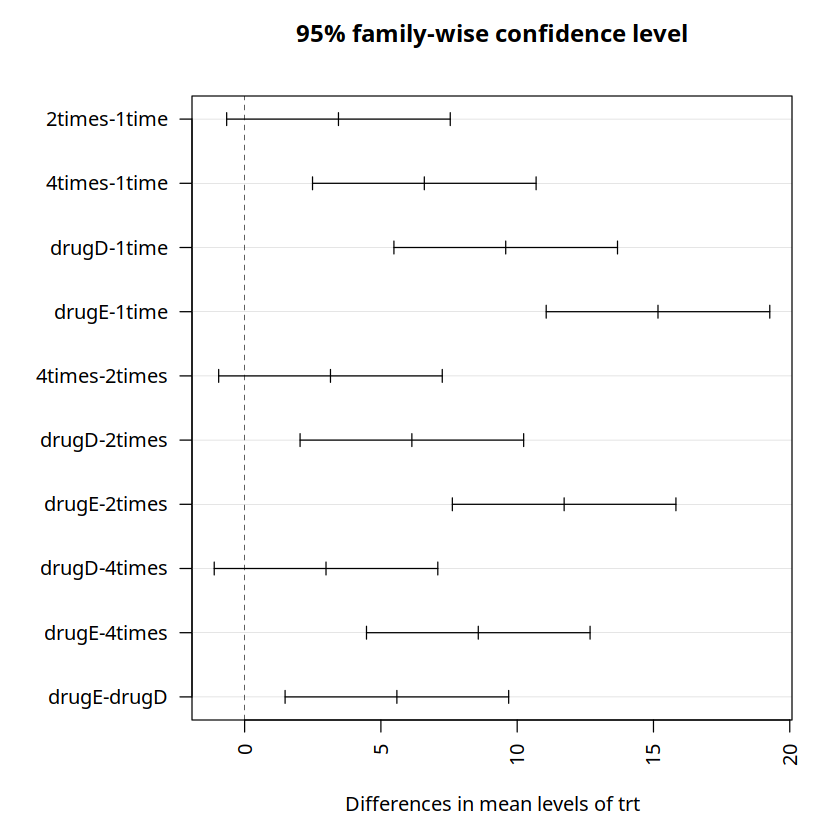

In [7]:
par(las = 2)
par(mar = c(5,8,4,2))
plot(TukeyHSD(fit))
# The first par statement rotates the axis labels, 
# and the second one increases the left margin area so that the labels fit
# In this graph, confidence intervals that include 0 indicate treatments 
# that aren’t significantly different (p > 0.5)

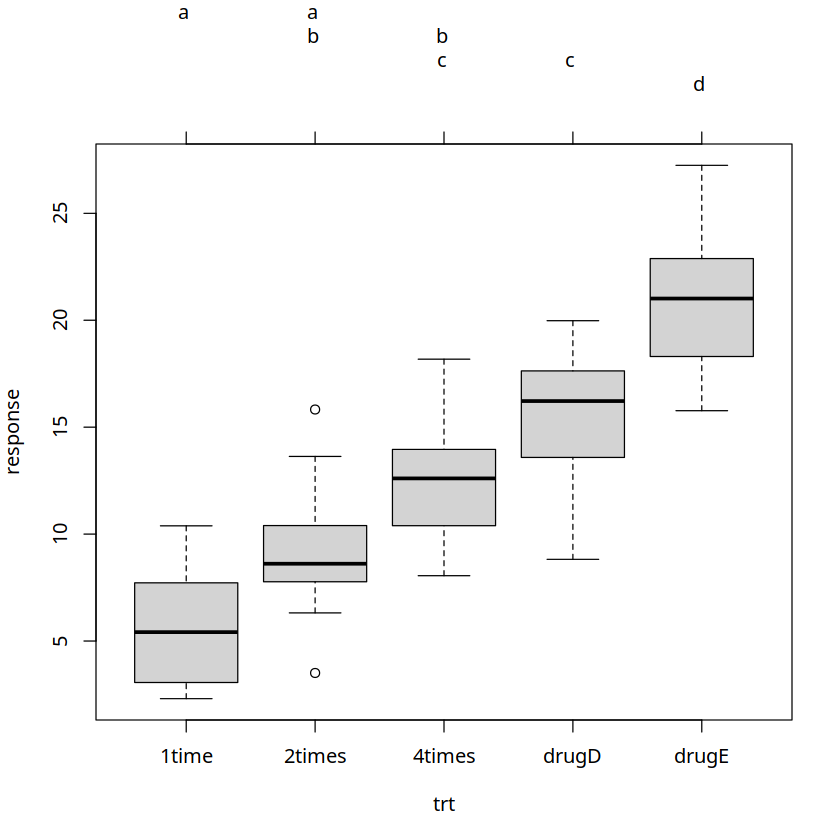

In [8]:
par(mar = c(5,4,6,2))
tuk <- glht(fit, linfct = mcp(trt="Tukey"))
plot(cld(tuk, level = 0.05), col = "lightgrey")

# the par statement increases the top margin to fit the letter array. 
# The level option in the cld() function provides the significance level to use 
# (0.05, or 95% confidence in this case).

## Assessing test assumptions

Loading required package: carData



[1] 19 38

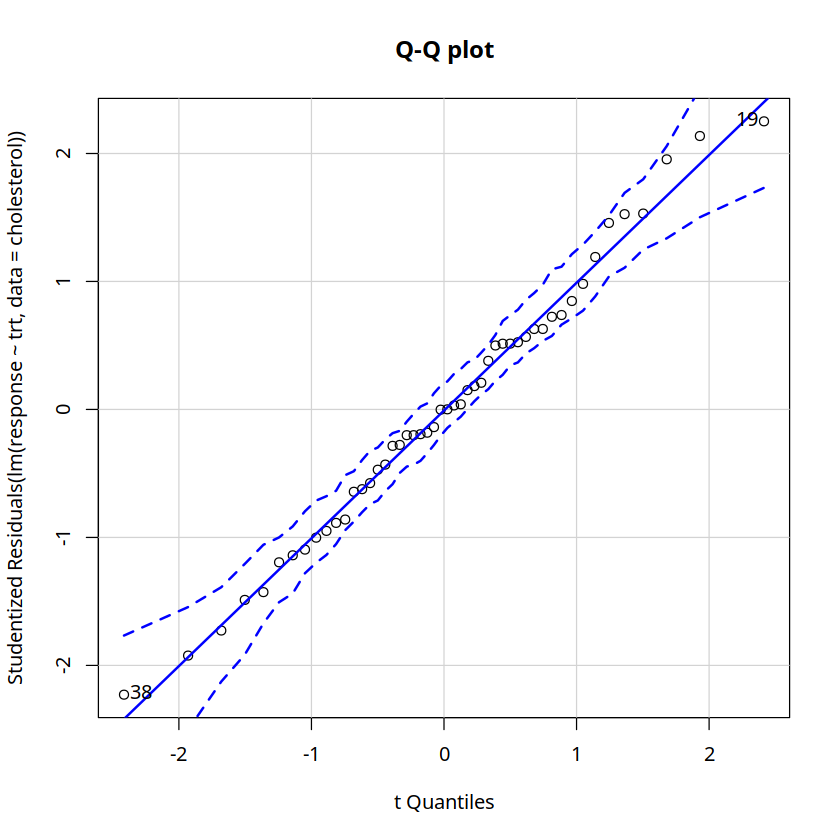

In [9]:
library(car)
qqPlot(lm(response ~ trt, data = cholesterol), simulate = 1, main = "Q-Q plot", lables=0)

# use a Q-Q plot to assess the normality assumption

In [10]:
# the equality (homogeneity) of variances
bartlett.test(response ~ trt, data = cholesterol)


	Bartlett test of homogeneity of variances

data:  response by trt
Bartlett's K-squared = 0.57975, df = 4, p-value = 0.9653


In [11]:
# analysis of variance methodologies can be sensitive to the presence of outliers
library(car)
outlierTest(fit)

No Studentized residuals with Bonferroni p < 0.05
Largest |rstudent|:
   rstudent unadjusted p-value Bonferroni p
19 2.251149           0.029422           NA

# 2. One-way ANCOVA

In [12]:
attach(litter)
table(dose)

dose
  0   5  50 500 
 20  19  18  17 

In [13]:
aggregate(weight, by = list(dose), FUN = mean)

Group.1,x
<fct>,<dbl>
0,32.30850
5,29.30842
50,29.86611
500,29.64647


In [14]:
fit <- aov(weight ~ gesttime + dose)
summary(fit)

            Df Sum Sq Mean Sq F value  Pr(>F)   
gesttime     1  134.3  134.30   8.049 0.00597 **
dose         3  137.1   45.71   2.739 0.04988 * 
Residuals   69 1151.3   16.69                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [15]:
library(effects)
effect("dose",fit)

Registered S3 methods overwritten by 'lme4':
  method                          from
  cooks.distance.influence.merMod car 
  influence.merMod                car 
  dfbeta.influence.merMod         car 
  dfbetas.influence.merMod        car 

lattice theme set by effectsTheme()
See ?effectsTheme for details.




 dose effect
dose
       0        5       50      500 
32.35367 28.87672 30.56614 29.33460 

In [16]:
# Multiple comparisons employing user-supplied contrasts

contrast <- rbind("no drug vs. drug" = c(3,-1,-1,-1))
# The contrast c(3, -1, -1, -1) specifies a comparison of the first group with 
# the average of the other three.
summary(glht(fit, linfct = mcp(dose = contrast)))


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: User-defined Contrasts


Fit: aov(formula = weight ~ gesttime + dose)

Linear Hypotheses:
                      Estimate Std. Error t value Pr(>|t|)  
no drug vs. drug == 0    8.284      3.209   2.581    0.012 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)


## Assessing test assumptions

In [17]:
fit2 <- aov(weight ~ gesttime * dose, data = litter)
summary(fit2)

              Df Sum Sq Mean Sq F value  Pr(>F)   
gesttime       1  134.3  134.30   8.289 0.00537 **
dose           3  137.1   45.71   2.821 0.04556 * 
gesttime:dose  3   81.9   27.29   1.684 0.17889   
Residuals     66 1069.4   16.20                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Loading required package: lattice

Loading required package: grid

Loading required package: latticeExtra

Loading required package: gridExtra


Attaching package: ‘HH’


The following objects are masked from ‘package:car’:

    logit, vif


The following object is masked from ‘package:gplots’:

    residplot




Analysis of Variance Table

Response: weight
          Df  Sum Sq Mean Sq F value   Pr(>F)   
gesttime   1  134.30 134.304  8.0493 0.005971 **
dose       3  137.12  45.708  2.7394 0.049883 * 
Residuals 69 1151.27  16.685                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

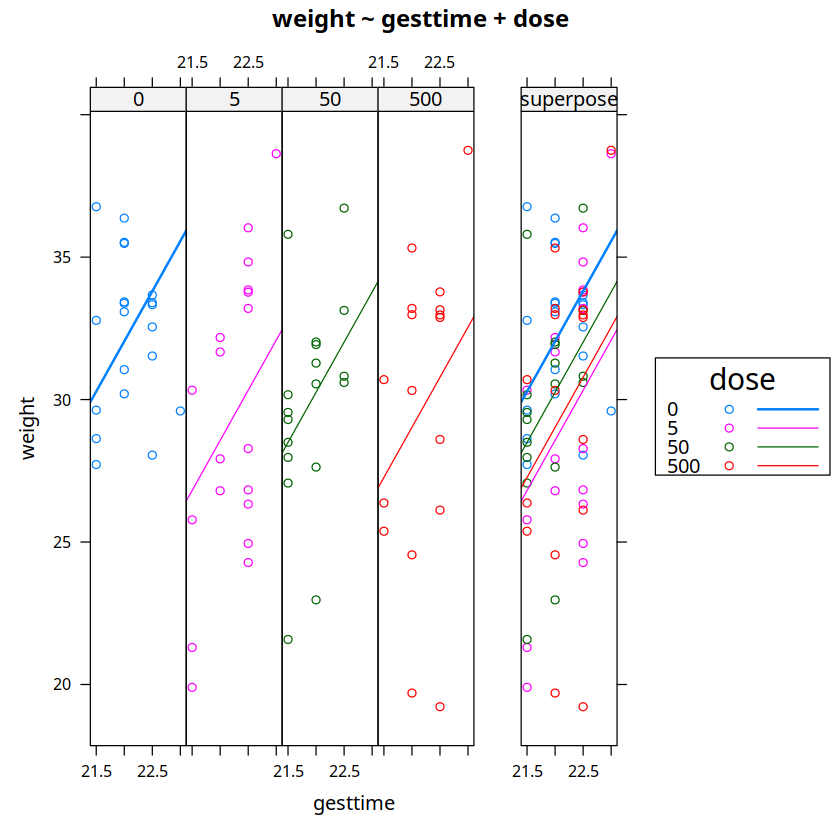

In [18]:
library(HH)
ancova(weight ~ gesttime + dose, data = litter)

# 3.Two-way factorial ANOVA

In [19]:
# Two-way ANOVA 
attach(ToothGrowth)
table(supp,dose)

The following object is masked from litter:

    dose




    dose
supp 0.5  1  2
  OJ  10 10 10
  VC  10 10 10

In [20]:
aggregate(len, by = list(supp, dose),FUN = mean)

Group.1,Group.2,x
<fct>,<dbl>,<dbl>
OJ,0.5,13.23
VC,0.5,7.98
OJ,1.0,22.70
VC,1.0,16.77
OJ,2.0,26.06
VC,2.0,26.14


In [21]:
aggregate(len, by = list(supp, dose),FUN = sd)

Group.1,Group.2,x
<fct>,<dbl>,<dbl>
OJ,0.5,4.459709
VC,0.5,2.746634
OJ,1.0,3.910953
VC,1.0,2.515309
OJ,2.0,2.655058
VC,2.0,4.797731


In [22]:
dose <- factor(dose)
fit <- aov(len ~ supp*dose)
summary(fit)

            Df Sum Sq Mean Sq F value   Pr(>F)    
supp         1  205.4   205.4  15.572 0.000231 ***
dose         2 2426.4  1213.2  92.000  < 2e-16 ***
supp:dose    2  108.3    54.2   4.107 0.021860 *  
Residuals   54  712.1    13.2                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

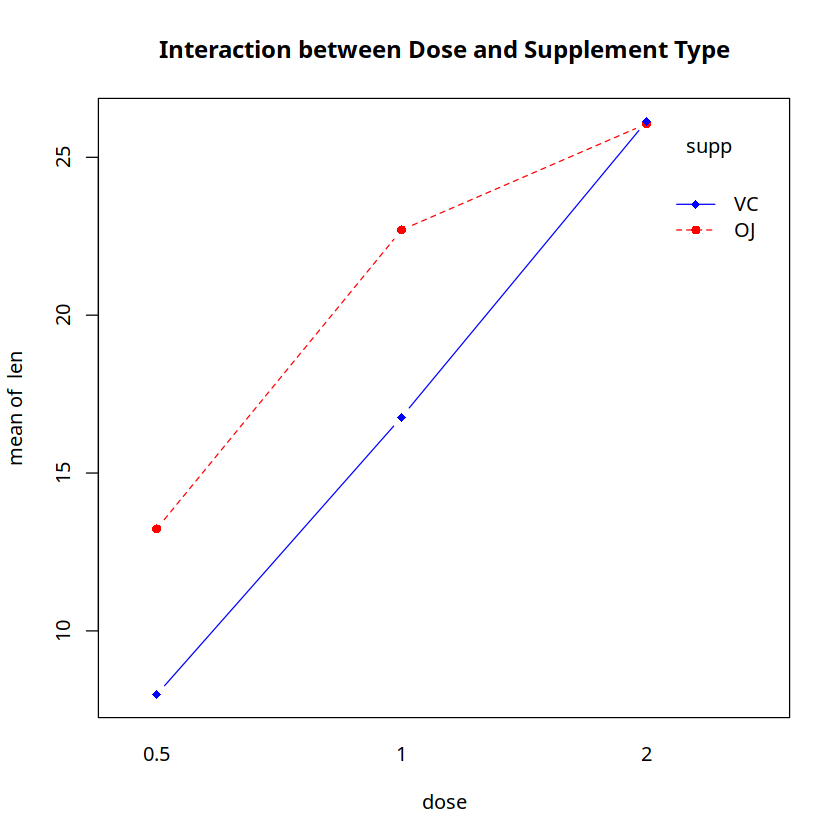

In [23]:
# The plot provides the mean tooth length for each supplement at each dosage
interaction.plot(dose, supp, len,type = "b", col = c("red","blue"), pch = c(16,18),
                main = "Interaction between Dose and Supplement Type")

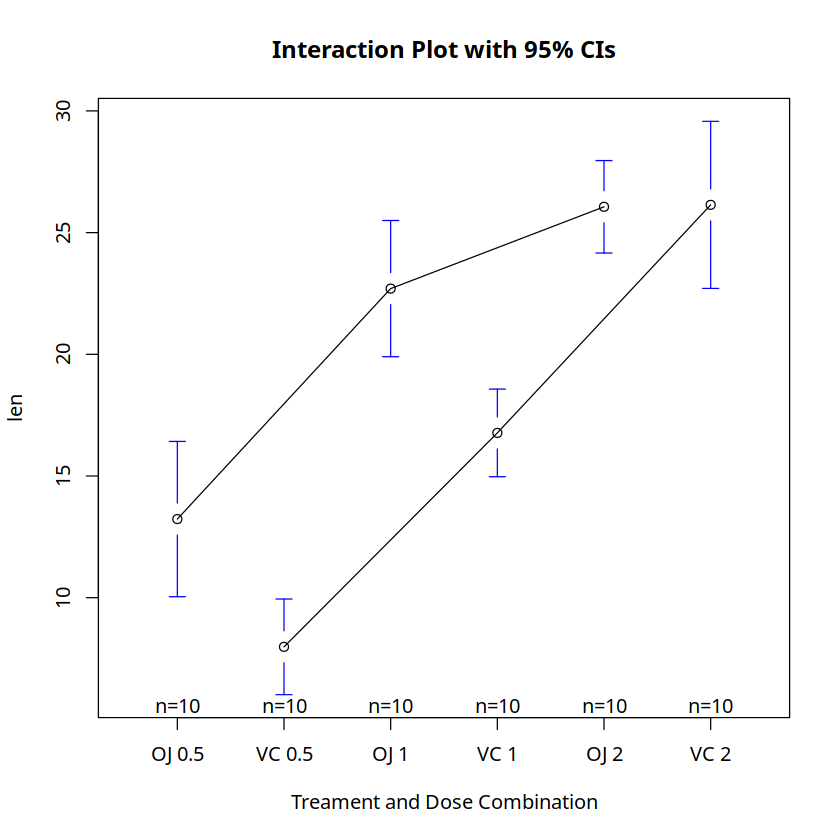

In [24]:
# Interaction between dose and delivery mechanism on tooth growth

library(gplots)
plotmeans(len ~ interaction(supp, dose, sep = " "),
         connect=list(c(1,3,5),c(2,4,6)),
         main = "Interaction Plot with 95% CIs",
         xlab= "Treament and Dose Combination")

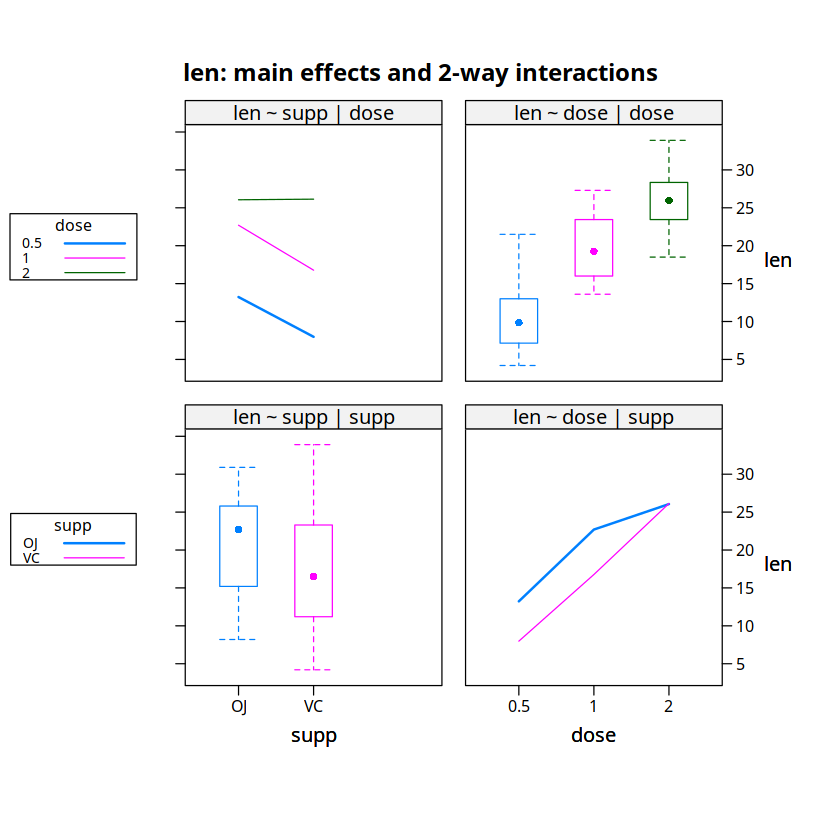

In [25]:
interaction2wt(len~supp*dose)

# 4. Repeated measures ANOVA

In [26]:
# Repeated measures ANOVA with one between- and within-groups factor

CO2$conc <- factor(CO2$conc)
w1b1 <- subset(CO2, Treatment == "chilled")
fit <- aov(uptake ~ conc*Type + Error(Plant/(conc)), data = w1b1)
summary(fit)


Error: Plant
          Df Sum Sq Mean Sq F value  Pr(>F)   
Type       1 2667.2  2667.2   60.41 0.00148 **
Residuals  4  176.6    44.1                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Error: Plant:conc
          Df Sum Sq Mean Sq F value   Pr(>F)    
conc       6 1472.4  245.40   52.52 1.26e-12 ***
conc:Type  6  428.8   71.47   15.30 3.75e-07 ***
Residuals 24  112.1    4.67                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

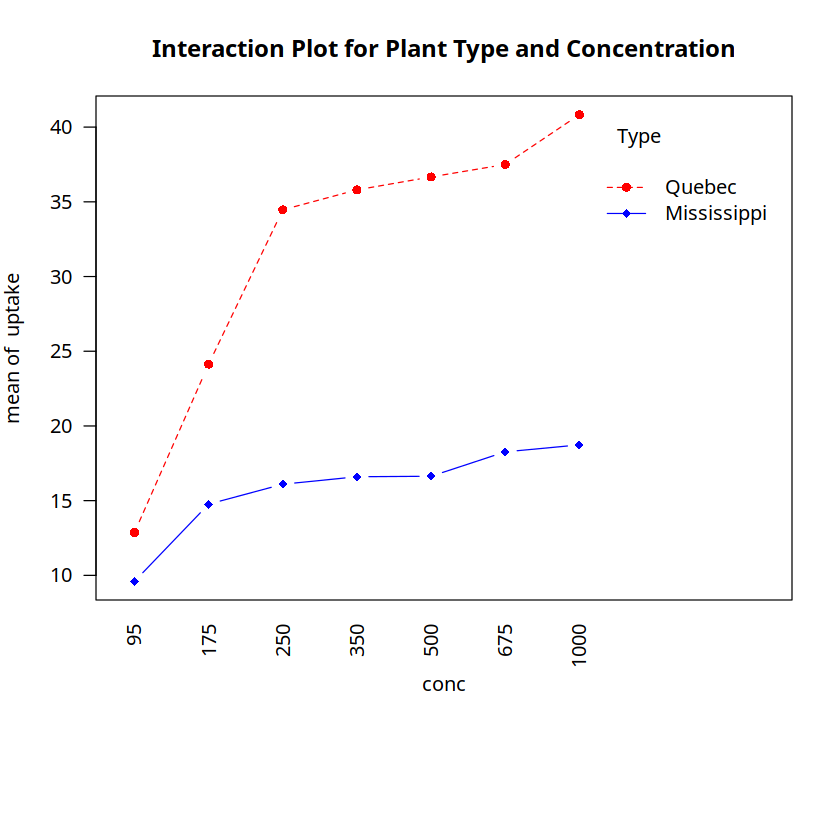

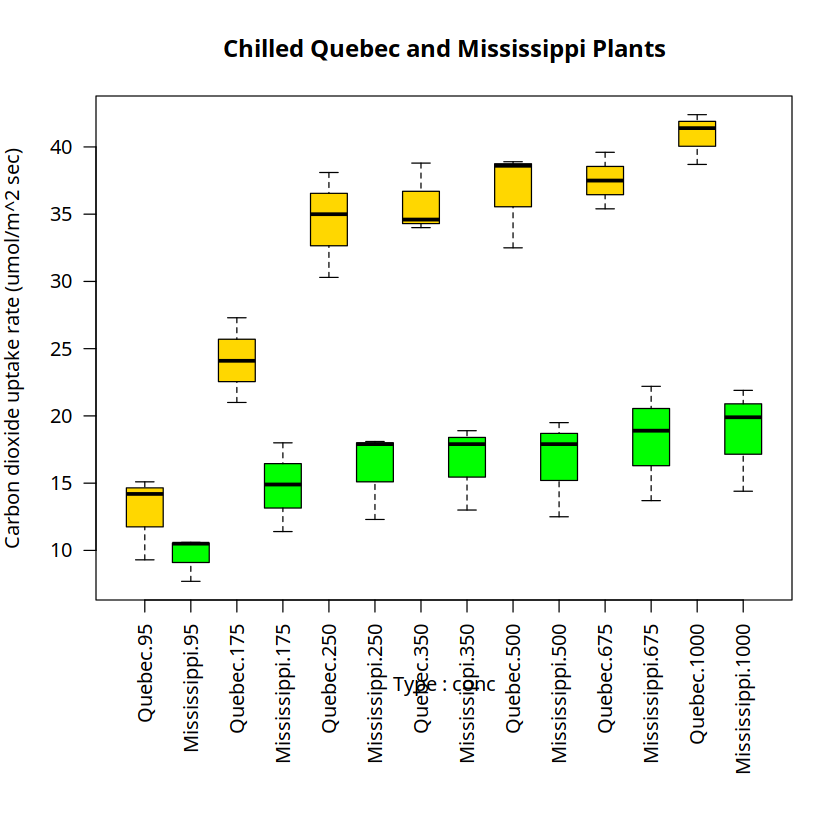

In [27]:
par(las=2)
par(mar=c(10,4,4,2))
with(w1b1, interaction.plot(conc,Type,uptake,
type="b", col=c("red","blue"), pch=c(16,18),
main="Interaction Plot for Plant Type and Concentration"))
boxplot(uptake ~ Type*conc, data=w1b1, col=(c("gold", "green")),
main="Chilled Quebec and Mississippi Plants",
ylab="Carbon dioxide uptake rate (umol/m^2 sec)")

# 4. Multivariate analysis of variance (MANOVA)

In [28]:
# One-way MANOVA

library(MASS)
attach(UScereal)
shelf <- factor(shelf)
y <- cbind(calories, fat, sugars)
aggregate(y, by = list(shelf), FUN = mean)

Group.1,calories,fat,sugars
<fct>,<dbl>,<dbl>,<dbl>
1,119.4774,0.6621338,6.295493
2,129.8162,1.3413488,12.507670
3,180.1466,1.9449071,10.856821


In [29]:
cov(y)

,calories,fat,sugars
calories,3895.24210,60.674383,180.380317
fat,60.67438,2.713399,3.995474
sugars,180.38032,3.995474,34.050018


In [30]:
fit <- manova(y ~ shelf)
summary(fit)

          Df Pillai approx F num Df den Df    Pr(>F)    
shelf      2 0.4021   5.1167      6    122 0.0001015 ***
Residuals 62                                            
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [31]:
summary.aov(fit)

 Response calories :
            Df Sum Sq Mean Sq F value    Pr(>F)    
shelf        2  50435 25217.6  7.8623 0.0009054 ***
Residuals   62 198860  3207.4                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

 Response fat :
            Df Sum Sq Mean Sq F value  Pr(>F)  
shelf        2  18.44  9.2199  3.6828 0.03081 *
Residuals   62 155.22  2.5035                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

 Response sugars :
            Df  Sum Sq Mean Sq F value   Pr(>F)   
shelf        2  381.33 190.667  6.5752 0.002572 **
Residuals   62 1797.87  28.998                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


## Assessing test assumptions

integer(0)

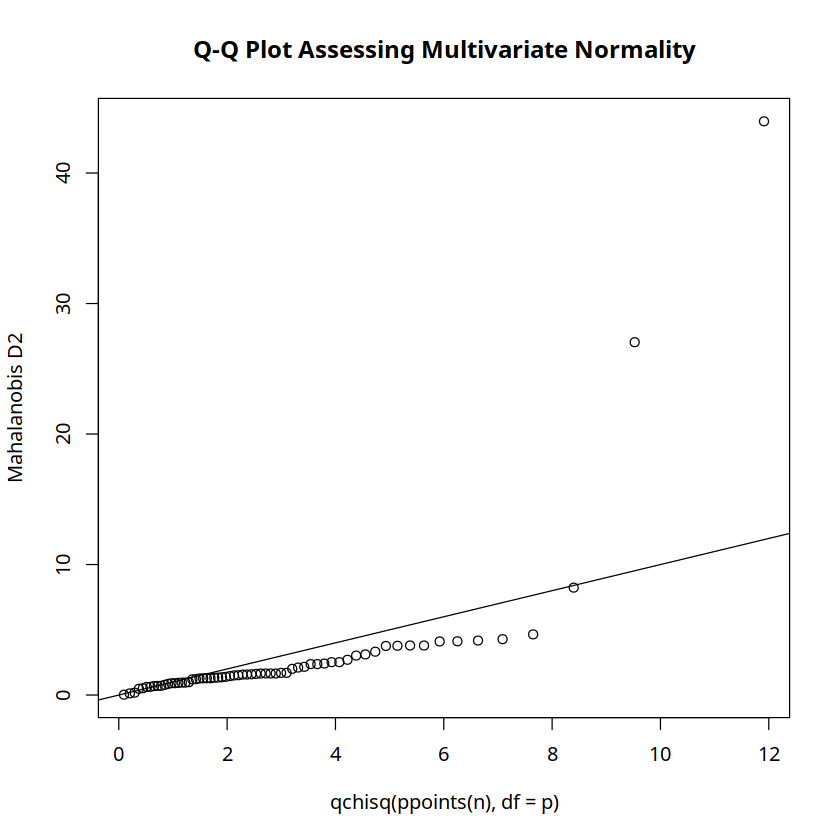

In [32]:
# Assessing multivariate normality

center <- colMeans(y)
n <- nrow(y)
p <- ncol(y)
cov <- cov(y)
d <- mahalanobis(y,center,cov)
coord <- qqplot(qchisq(ppoints(n),df=p),d,
               main="Q-Q Plot Assessing Multivariate Normality",
                ylab="Mahalanobis D2")
abline(a=0,b=1)
identify(coord$x, coord$y, labels=row.names(UScereal))

Loading required package: sgeostat

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

sROC 0.1-2 loaded



Projection to the first and second robust principal components.
Proportion of total variation (explained variance): 0.9789888


$outliers
 [1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE
[13] FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE
[25] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE
[37] FALSE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE
[49] FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[61] FALSE FALSE FALSE FALSE FALSE

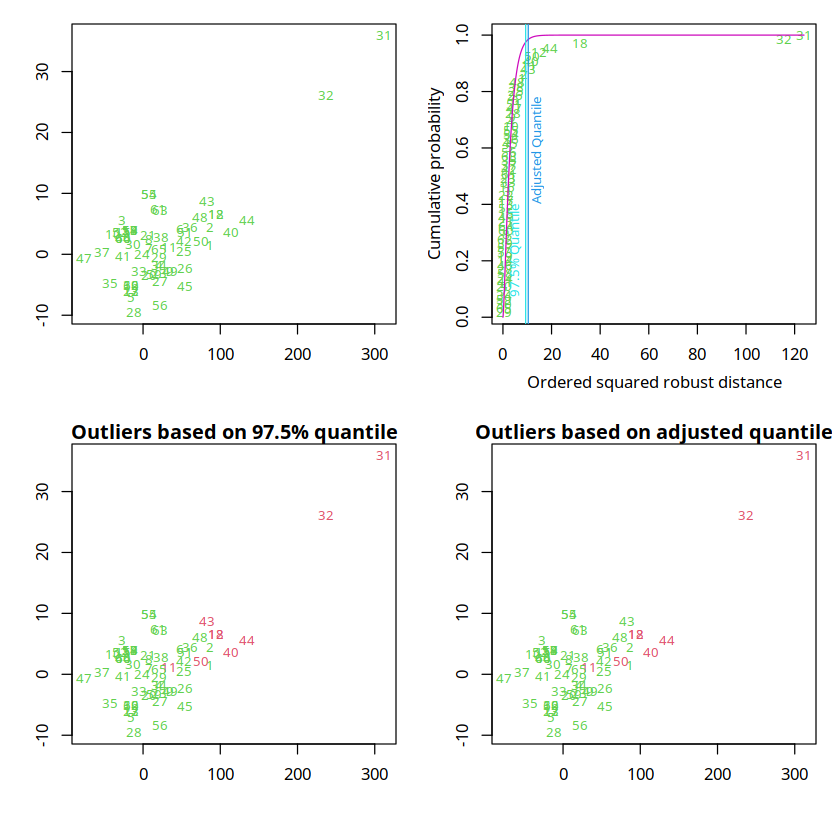

In [34]:
# test for multivariate outliers
library(mvoutlier)
outliers <- aq.plot(y)
outliers

## Robust MANOVA

In [35]:
# Robust one-way MANOVA
library(rrcov)
Wilks.test(y,shelf,method="mcd")

Loading required package: robustbase


Attaching package: ‘robustbase’


The following object is masked from ‘package:survival’:

    heart


Scalable Robust Estimators with High Breakdown Point (version 1.5-5)





	Robust One-way MANOVA (Bartlett Chi2)

data:  x
Wilks' Lambda = 0.51073, Chi2-Value = 22.8294, DF = 4.8397, p-value =
0.0003139
sample estimates:
  calories       fat    sugars
1 119.8210 0.7010828  5.663143
2 128.0407 1.1849576 12.537533
3 160.8604 1.6524559 10.352646
